In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    'Iris.data',
    header=None,
    names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.shape    #150 rows 6 features 

(150, 5)

In [27]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


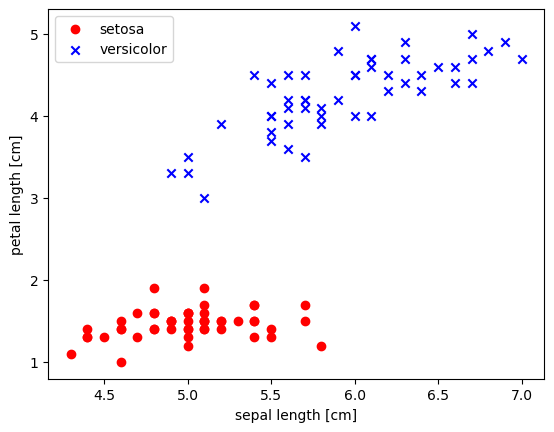

In [29]:

y = df.iloc[0:100, 4].values  
y = np.where(y == 'Iris-setosa', 0, 1) # when setosa 0 else 1 "versicolor"
x = df.iloc[0:100, [0, 2]].values   #WORK on just two features 1sepal length and petal  length
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa') #draw first 50 points in first coulmn pluse 50 in second column red and shape circle
plt.scatter(x[50:100, 0], x[50:100, 1],color='blue', marker='x', label='versicolor') #draw next 50 points in first coulmn pluse 50 in second column blue and shape x    
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()      

In [30]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50,random_state=1):
        self.eta = eta # learning rate
        self.n_iter = n_iter  # number of iterations
        self .random_state = random_state  # to set the seed for random number generator

    def fit(self, X, y):  #learning process
        rgen = np.random.RandomState(self.random_state)
        self.w_ =   rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []  #to record the number of misclassifications in each epoch / when error=1 that have an missclassification

        for _ in range(self.n_iter):    #first iteration to last iteration
            errors = 0
            for xi, target in zip(X, y):    #xi= input vector  target = actual class label
                update = self.eta * (target - self.predict(xi)) #ERROR low= learning rate *target(y) - predicted value(y^)
                self.w_[1:] += update * xi #weights update
                self.w_[0] += update #bias weight
                errors += int(update != 0.0)   # if update not equal 0.0 add 1 to errors
            self.errors_.append(errors)  #all errors for each epoch
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0) # if net input  graeter or equal >=0 return 1 else 0  
    

#the for loop will end when finish first 100 sample  finish 1 epoch 
# and make thats process again for 2epoch until finish all 50 epoch
#in each epoch we will have a number of errors

In [31]:
ppn = Perceptron(eta=0.1, n_iter=10)
#thats go to def __init and make eta=0.1 and n_iter=10 
ppn.fit(x, y)  #thats go to def fit and make x= X and y= y         x: data set   Y: class label
# thats make the learning process

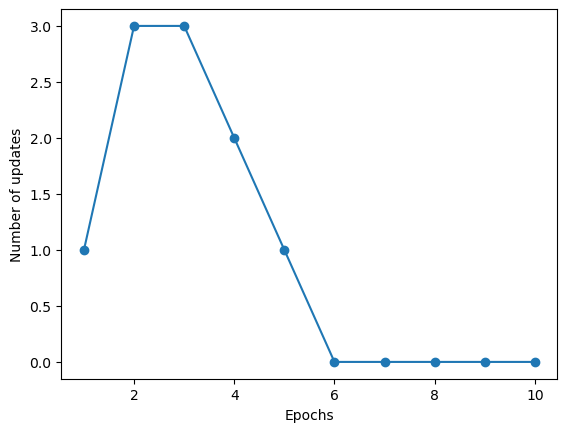

In [32]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')  #x axis number of epochs  y axis number of missclassifications
plt.xlabel('Epochs')   
plt.ylabel('Number of updates')  #number of missclassifications
plt.show()

In [33]:
ppn = Perceptron(eta=0.1, n_iter=1000)
ppn.fit(x, y)

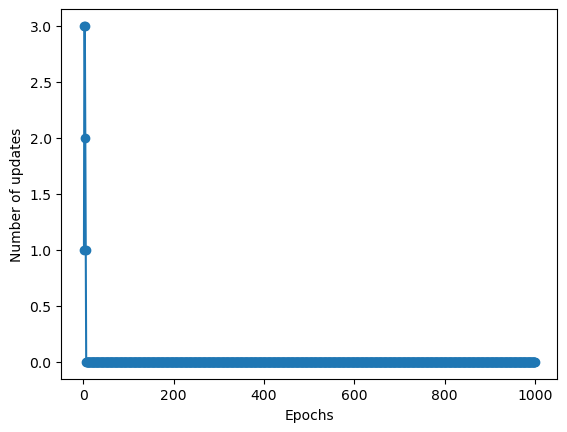

In [34]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o') 
plt.xlabel('Epochs')   
plt.ylabel('Number of updates')
plt.show()

#the curve show the number decrease in the number of missclassifications as the number of epochs increase

In [35]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

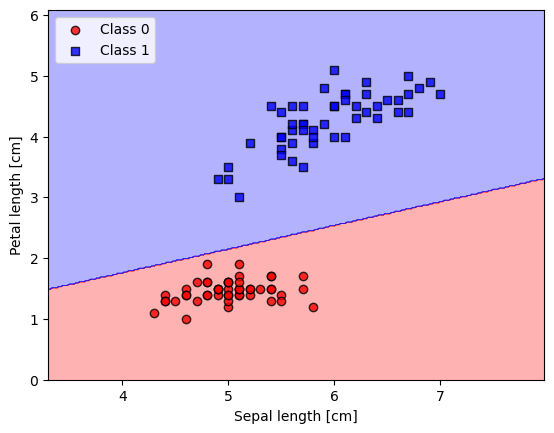

In [36]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [37]:
final_weights = ppn.w_[1:]
final_bias = ppn.w_[0]
print("final weights:", final_weights)
print("final bias:", final_bias)
print("complete w_ array:", ppn.w_)

final weights: [-0.35611756  0.91471828]
final bias: -0.18375654636336758
complete w_ array: [-0.18375655 -0.35611756  0.91471828]


#final weights: [-0.35611756  0.91471828]
final bias: -0.18375654636336758
complete w_ array: [-0.18375655 -0.35611756  0.91471828]       first bias   secound W1   third w2